# Cisco - Ariel University API Security Detection Challenge 2023
## Baseline code


### Imports and global settings

some of the ideas based on:

https://github.com/ArielCyber/Cisco_Ariel_Uni_API_security_challenge

https://machinelearningmastery.com/rfe-feature-selection-in-python/ 

https://www.activestate.com/blog/top-10-python-machine-learning-algorithms/



In [4]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 4 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
# with open(f'./dataset_{str(dataset_number)}.json') as file:
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.Attack_Tag,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",NaN,NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,NaN,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",LOG4J,NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\david\AppData\Local\Temp\ipykernel_19052\3405824618.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap=color)


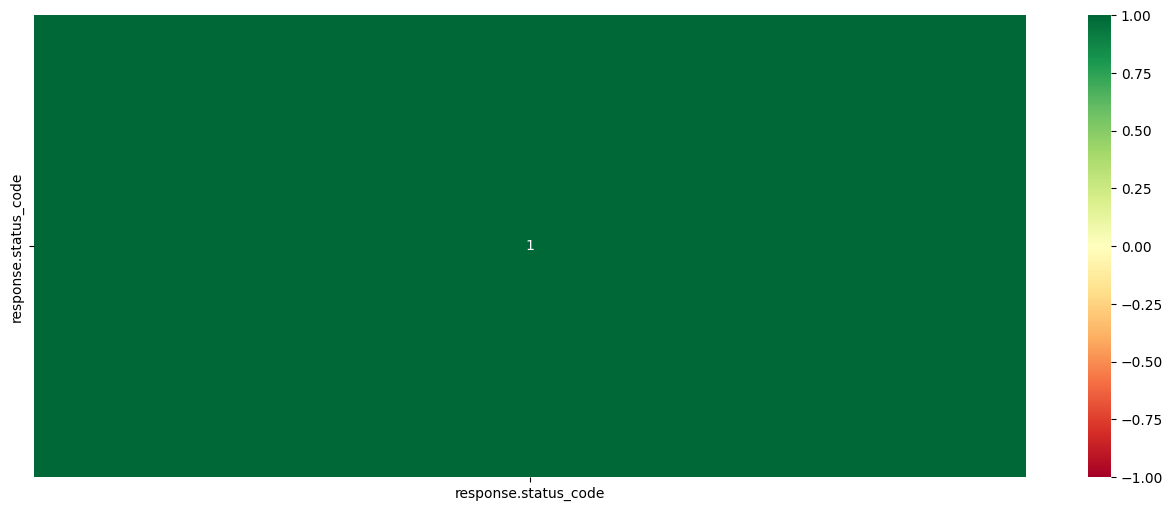

In [5]:
import matplotlib.pyplot as plt 
def show_correlation(df):
    color = plt.get_cmap('RdYlGn')  # default color
    color.set_bad('lightblue')  # if the value is bad the color would be lightblue instead of white
    plt.figure(figsize=(16, 6))
    # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap=color)
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    plt.show()
show_correlation(df)

### Basic dataset label arrangements

In [93]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

# df

In [94]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
    # df[column] = df[column].fillna("")
    # df[column] = df[column].fillna(0)

    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()
# df.loc[:, df.isnull().any()]

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",None,None,None,None,None,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",None,None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,None,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",None,None,None,None,None,LOG4J,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,None,None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",None,None,None,None,None,Benign,Benign


In [89]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                'request.headers.Connection',
                'request.headers.Host',
                'request.headers.Accept',
                'request.method',
                'request.headers.Accept-Language',
                'request.headers.Sec-Fetch-Site',
                'request.headers.Sec-Fetch-Mode',
                'request.headers.Sec-Fetch-Dest',
                'request.headers.Sec-Fetch-User',
                'response.status',
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                    'request.headers.Set-Cookie',
                    'request.headers.Date',
                    'request.url',
                    'response.headers.Content-Type',
                    'response.body',
                    'response.headers.Location',
                    'request.headers.Content-Length',
                    'request.headers.Cookie',
                    'response.headers.Set-Cookie'
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'response.headers.Content-Length',
                    'request.headers.Date']

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
# df.head()

In [95]:
# df = vectorize_df(df)

In [35]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   request.headers.Host             127500 non-null  int32  
 1   request.headers.User-Agent       127500 non-null  float64
 2   request.headers.Accept-Encoding  127500 non-null  int32  
 3   request.headers.Accept           127500 non-null  int32  
 4   request.headers.Connection       127500 non-null  int32  
 5   request.headers.Accept-Language  127500 non-null  int32  
 6   request.headers.Sec-Fetch-Site   127500 non-null  int32  
 7   request.headers.Sec-Fetch-Mode   127500 non-null  int32  
 8   request.headers.Sec-Fetch-User   127500 non-null  int32  
 9   request.headers.Sec-Fetch-Dest   127500 non-null  int32  
 10  request.headers.Set-Cookie       127500 non-null  float64
 11  request.method                   127500 non-null  int32  
 12  re

In [96]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept', 'request.headers.Connection', 'request.headers.Sec-Ch-Ua-Platform', 'request.headers.Sec-Ch-Ua-Mobile', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Cache-Control', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie', 'request.headers.Content-Length', 'response.headers.Set-Cookie', 'request.headers.Upgrade-Insecure-Requests']


request.headers.Host                           int32
request.headers.User-Agent                   float64
request.headers.Accept-Encoding                int32
request.headers.Accept                         int32
request.headers.Connection                     int32
request.headers.Sec-Ch-Ua-Platform            object
request.headers.Sec-Ch-Ua-Mobile              object
request.headers.Accept-Language                int32
request.headers.Sec-Fetch-Site                 int32
request.headers.Sec-Fetch-Mode                 int32
request.headers.Cache-Control                 object
request.headers.Sec-Fetch-User                 int32
request.headers.Sec-Fetch-Dest                 int32
request.headers.Set-Cookie                   float64
request.method                                 int32
request.url                                  float64
response.status                                int32
response.headers.Content-Type                float64
response.status_code                          

## Train test split

In [97]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()


# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(150508, 25) (150508,)
(32259, 25) (32259,)


Counter({'Benign': 143297, 'Malware': 39470})

# in order to change from val to x_test see the code below

In [98]:
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df_val = pd.json_normalize(raw_ds, max_level=2)

for column in test_df_val.columns[test_df_val.isna().any()].tolist():
     test_df_val[column] = test_df_val[column].fillna('None')


test_df_val = vectorize_df(test_df_val)

Val_Test = test_df_val[features_list].to_numpy()

# if you want to test the val dont mark this row below 
X_test = Val_Test

## Model choosing and fitting

In [110]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

ValueError: could not convert string to float: 'None'

## Result printout

In [40]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
randomForestClassifier_predictions = clf.predict(X_test)
true_labels = y_test
# cf_matrix = confusion_matrix(true_labels, randomForestClassifier_predictions)
# clf_report = classification_report(true_labels, randomForestClassifier_predictions, digits=5)
# heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                    #   xticklabels=np.unique(true_labels), 
                    #   yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
# print(clf_report)

In [102]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train)

# ypred = model.predict(X_test)
KNeighborsClassifier_prediction = model.predict(X_test)
index = 0 
# for i in ypred:
#     index += 1
#     if index<11:
#         print(i)

# clf_report = classification_report(true_labels, KNeighborsClassifier_prediction, digits=5)

# print("\n\nK-Nearest Neighbor Accuracy Score:\n", clf_report, )

ValueError: could not convert string to float: 'None'

In [42]:
# from sklearn.svm import SVC

# from sklearn.ensemble import BaggingClassifier

# model = BaggingClassifier(

#  base_estimator=SVC(),

#  n_estimators=10,

#  random_state=0

# )

# model.fit(X_train, y_train)
 
# baggingClassifier_predidtion = model.predict(X_test)

# clf_report = classification_report(true_labels, baggingClassifier_predidtion, digits=5)

# print("\n\nBaggingClassifier Accuracy Score:\n", clf_report, )

In [103]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

decisionTreeClassifier_perdiction = model.predict(X_test)

# clf_report = classification_report(true_labels, decisionTreeClassifier_perdiction, digits=5)

# print(clf_report)

ValueError: could not convert string to float: 'None'

In [104]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

gaussianNB_prediction = model.predict(X_test)

# clf_report = classification_report(true_labels, gaussianNB_prediction, digits=5)

# print(clf_report)

ValueError: could not convert string to float: 'None'

In [105]:
from sklearn import svm

model = svm.LinearSVC(random_state=800)

model.fit(X_train, y_train)

linearSVC_prediction = model.predict(X_test)

# clf_report = classification_report(true_labels, linearSVC_prediction, digits=5)

# print(clf_report)

ValueError: could not convert string to float: 'None'

In [106]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()

model.fit(X_train, y_train)

SGDClassifier_prediction = model.predict(X_test)

# clf_report = classification_report(true_labels, SGDClassifier_prediction, digits=5)

# print(clf_report)

ValueError: could not convert string to float: 'None'

In [107]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

logisticRegression_prediction = model.predict(X_test)

# clf_report = classification_report(true_labels, logisticRegression_prediction, digits=5)

# print(clf_report)


ValueError: could not convert string to float: 'None'

In [56]:
# randomForestClassifier_predictions  best
# KNeighborsClassifier_prediction
# baggingClassifier_predidtion        worst
# decisionTreeClassifier_perdiction
# gaussianNB_prediction
# linearSVC_prediction
# SGDClassifier_prediction
# logisticRegression_prediction

prediction = []

for  i in range(len(randomForestClassifier_predictions)):
    tmpans = str()
    count = 0 

    if str(randomForestClassifier_predictions[i]) == "Benign":
        # count += 12.5
        # count += 14.1
        count += 18.02 
    if str(logisticRegression_prediction[i]) == "Benign":
        # count += 12.5
        # count += 13.175
        count += 15.175
    if str(KNeighborsClassifier_prediction[i]) == "Benign":
        # count += 12.5
        # count += 13.485
        count += 15.485
    if str(decisionTreeClassifier_perdiction[i]) == "Benign":
        # count += 12.5
        # count += 13.64
        count += 15.64
    # if str(baggingClassifier_predidtion[i]) == "Benign":
    #     # count += 12.5
    #     # count += 9.92
    #     count += 8.92
    if str(gaussianNB_prediction[i]) == "Benign":
        # count += 12.5
        # count += 12.09
        count += 12.09
    if str(linearSVC_prediction[i]) == "Benign":
        # count += 12.5
        # count += 11.78
        count += 11.78

    if str(SGDClassifier_prediction[i]) == "Benign":
        # count += 12.5
        # count += 11.625
        count += 11.625

    if count >= 85:
        tmpans = "Benign"
    else:
        tmpans = "Malware"
    
    prediction.append(tmpans)

clf_end_report = classification_report(true_labels, prediction, digits=5)

print(clf_end_report)

              precision    recall  f1-score   support

      Benign    0.98891   0.97713   0.98299     20812
     Malware    0.75464   0.86525   0.80617      1692

    accuracy                        0.96872     22504
   macro avg    0.87178   0.92119   0.89458     22504
weighted avg    0.97130   0.96872   0.96969     22504



# Test

In [49]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
# with open(f'./dataset_{str(dataset_number)}_val.json') as file:
#     raw_ds = json.load(file)
# test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
# test_df = vectorize_df(test_df)

# Predict with your model
# X = test_df[features_list].to_numpy()
# predictions = clf.predict(X)

# Save your predictions

In [50]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(prediction), fmt='%2d')

In [51]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline

# # define dataset
# X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, random_state=1)
# # create pipeline
# rfe = RFECV(estimator=DecisionTreeClassifier())
# model = DecisionTreeClassifier()
# pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# # evaluate model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [52]:

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# stdSc = StandardScaler()
# xTrain = stdSc.fit_transform(X_train)
# xTest = stdSc.transform(X_test)

# from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor()

# gbr.fit(xTrain, y_train)

# ypred = model.predict(xTest)

# clf_report = classification_report(true_labels, ypred, digits=5)

# print(clf_report)

